In [3]:
import pandas as pd

# Load dataset with correct path
file_path = "/Users/shivangisingh/PycharmProjects/ML_Lab_6thSem/Most popular 1000 Youtube videos.csv"

# Read the dataset
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())



   rank                                              Video    Video views  \
0     1  Lil Nas X - Old Town Road (Official Movie) ft....     54,071,677   
1     2  20 Tennis shots if they were not filmed, NOBOD...      3,471,237   
2     3                 JoJo Siwa - Karma (Official Video)     34,206,747   
3     4    David Kushner - Daylight (Official Music Video)     18,558,390   
4     5  Wiz Khalifa - See You Again ft. Charlie Puth [...  6,547,981,039   

        Likes Dislikes Category  published  
0   3,497,955   78,799    Music       2019  
1      19,023      859      NaN       2017  
2     293,563      NaN    Music       2024  
3     680,732      NaN    Music       2023  
4  44,428,537      NaN    Music       2015  


In [8]:
# Check the number of rows and columns
print("Dataset Shape:", df.shape)

# Display column names
print("Columns:", df.columns)

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check data types of each column
print(df.dtypes)

# Summary statistics
print(df.describe())


Dataset Shape: (1000, 7)
Columns: Index(['rank', 'Video', 'Video views', 'Likes', 'Dislikes', 'Category',
       'published'],
      dtype='object')
Missing Values:
 rank             0
Video            0
Video views      0
Likes            0
Dislikes       473
Category        18
published        0
dtype: int64
rank            int64
Video          object
Video views    object
Likes          object
Dislikes       object
Category       object
published       int64
dtype: object
              rank    published
count  1000.000000  1000.000000
mean    500.500000  2019.100000
std     288.819436     5.384328
min       1.000000  2005.000000
25%     250.750000  2017.000000
50%     500.500000  2021.000000
75%     750.250000  2024.000000
max    1000.000000  2025.000000


In [9]:
# Unique categories in 'Category'
print("Unique Categories:", df["Category"].unique())


Unique Categories: ['Music' nan 'Entertainment' 'People & Blogs' 'News & Politics'
 'Pets & Animals' 'Sports' 'Travel & Events' 'Education' 'Gaming' 'Comedy'
 'Film & Animation' 'Autos & Vehicles' 'Howto & Style'
 'Science & Technology' 'Nonprofits & Activism']


In [10]:
# Remove commas and convert to numeric
for col in ["Video views", "Likes", "Dislikes"]:
    df[col] = df[col].str.replace(",", "").astype(float)


In [13]:
import pandas as pd

# Sample DataFrame
data = {"Likes": [100, 200, 150], "Dislikes": [10, None, 20]}
df = pd.DataFrame(data)

# Fix: Avoid inplace modification on a copy
df["Dislikes"] = df["Dislikes"].fillna(df["Dislikes"].median())

# Display updated DataFrame
print(df)


   Likes  Dislikes
0    100      10.0
1    200      15.0
2    150      20.0


In [14]:
print(df.isnull().sum())  # Ensure there are no NaN values


Likes       0
Dislikes    0
dtype: int64


In [15]:
df["Dislikes"] = df["Dislikes"].astype(int)  # Convert to integer


In [16]:
print(df.describe())


       Likes  Dislikes
count    3.0       3.0
mean   150.0      15.0
std     50.0       5.0
min    100.0      10.0
25%    125.0      12.5
50%    150.0      15.0
75%    175.0      17.5
max    200.0      20.0


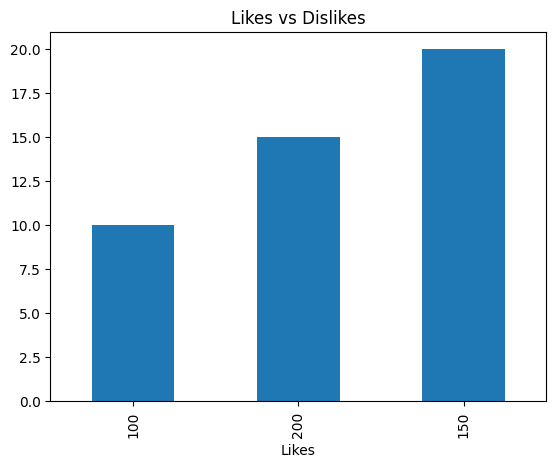

In [17]:
import matplotlib.pyplot as plt

df.plot(kind="bar", x="Likes", y="Dislikes", legend=False)
plt.title("Likes vs Dislikes")
plt.show()


In [18]:
df.to_csv("cleaned_data.csv", index=False)


In [20]:
# Sample DataFrame
data = {"Likes": [100, 200, 150, 250, 300, 350], 
        "Dislikes": [10, None, 20, 25, None, 40]}
df = pd.DataFrame(data)

# Fill missing values in "Dislikes" with the median
df["Dislikes"] = df["Dislikes"].fillna(df["Dislikes"].median())

print(df)  # Check the cleaned data


   Likes  Dislikes
0    100      10.0
1    200      22.5
2    150      20.0
3    250      25.0
4    300      22.5
5    350      40.0


In [21]:
# Features (Independent Variable)
X = df[["Likes"]]

# Target (Dependent Variable)
y = df["Dislikes"]

# Split into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data:\n", X_train)
print("Testing Data:\n", X_test)


Training Data:
    Likes
5    350
2    150
4    300
3    250
Testing Data:
    Likes
0    100
1    200


In [22]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")


Intercept: 5.5000000000000036
Coefficient: 0.08142857142857142


In [23]:
# Predict on test data
y_pred = model.predict(X_test)

# Compare actual vs predicted values
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(results)


   Actual  Predicted
0    10.0  13.642857
1    22.5  21.785714


In [24]:
# Compute Mean Squared Error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 6.8903061224489885
R-squared Score: 0.8236081632653058


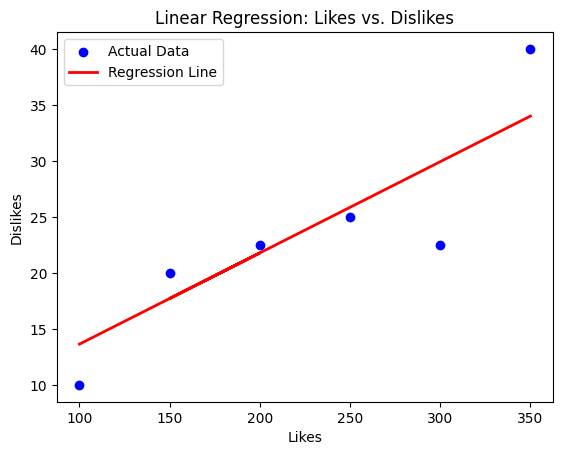

In [25]:
# Scatter plot of actual data
plt.scatter(X, y, color="blue", label="Actual Data")

# Plot regression line
plt.plot(X, model.predict(X), color="red", linewidth=2, label="Regression Line")

# Labels and title
plt.xlabel("Likes")
plt.ylabel("Dislikes")
plt.legend()
plt.title("Linear Regression: Likes vs. Dislikes")

# Show plot
plt.show()
